<a href="https://colab.research.google.com/github/SuneelAbbigari/Machine-Learning/blob/master/Customized_VGG16_CIFAR10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing required modules

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.applications.vgg16 import VGG16
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
#Downloading the CIFAR10 Data.

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
display(x_train.shape)
display(y_train.shape)

print(type(y_train[0]))
print("x_train shape is :", y_train[0])

(50000, 32, 32, 3)

(50000, 1)

<class 'numpy.ndarray'>
x_train shape is : [6]


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


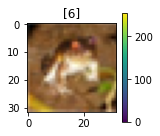

In [4]:
plt.figure(figsize=(2,2))
plt.title(y_train[0])
plt.imshow(x_train[0])
plt.colorbar()

In [5]:
#Normalizing the data.

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

x_train /= 255
x_test /= 255


y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [6]:
print(type(x_train[0]))
print("x_train shape is :", x_train[0])

print(type(y_train[0]))
print("x_train shape is :", y_train[0])

<class 'numpy.ndarray'>
x_train shape is : [[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


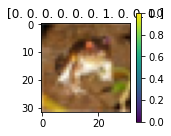

In [7]:
plt.figure(figsize=(2,2))
plt.title(y_train[0])
plt.imshow(x_train[0])
plt.colorbar()

In [8]:
#Splitting the train data as train and valid data.

train_data, valid_data, train_val, valid_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1,stratify=y_train)

# Datasets shapes
print( "train_data shape",train_data.shape)
print( "train_val shape",train_val.shape)
print( "valid_data shape",valid_data.shape)
print( "valid_val shape",valid_val.shape)

train_data shape (40000, 32, 32, 3)
train_val shape (40000, 10)
valid_data shape (10000, 32, 32, 3)
valid_val shape (10000, 10)


Frog


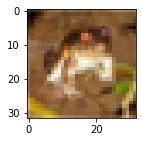

In [9]:
#Assigning the label for each categoty.

labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
max_index_col = np.argmax(y_train[0], axis=0)
max_index_col

plt.figure(figsize=(2,2))
print(labels[max_index_col])
plt.imshow(x_train[0])

In [10]:
#Taking the layers of VGG16, except the last layer (out put layer)

base= VGG16(weights='imagenet', 
                  include_top=False, 
                  input_shape=(32, 32, 3))

base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [11]:
#Making few VGG layers as trainable layers.

for layer in base.layers:
  layer.trainable = False
for layer in base.layers[15:]:
  layer.trainable = True

In [12]:
#Checking the each layer status.

for layer in base.layers:
    print(layer, layer.name, layer.trainable)
    

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fcdb4de9f60> input_1 False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fcdb4dc4b70> block1_conv1 False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fcdb4dc4518> block1_conv2 False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fcdb4da32e8> block1_pool False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fcdb4dbada0> block2_conv1 False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fcdb4dd0128> block2_conv2 False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fcdb45484e0> block2_pool False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fcdb454fba8> block3_conv1 False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fcdb4557320> block3_conv2 False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fcdb02744e0> block3_conv3 False
<tensorflow.python.keras.

In [13]:
model = Sequential()
model.add(base)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               65664     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 14,798,154
Trainable params: 7,162,890
Non-trainable params: 7,635,264
_____________________________________

In [15]:
datagen = ImageDataGenerator(
            horizontal_flip=True,
            rotation_range=20,
            width_shift_range=0.1,
            height_shift_range=0.1,
            zoom_range=0.2,
            fill_mode='nearest'
            )

datagen.fit(train_data)
print( "train_data shape",train_data.shape)
print( "train_val shape",train_val.shape)

train_data shape (40000, 32, 32, 3)
train_val shape (40000, 10)


In [16]:
categorical_crossentropy = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

model.compile(optimizer='adam',loss= 'categorical_crossentropy',metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.0001, patience=4) 

history = model.fit_generator(datagen.flow(train_data, train_val,
                              batch_size=128),
                              epochs=40,
                              callbacks=[callback],
                              validation_data=(valid_data, valid_val),
                              shuffle=True)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/40
313/313 [==============================] - 38s 122ms/step - loss: 1.5382 - accuracy: 0.4470 - val_loss: 1.0310 - val_accuracy: 0.6546
Epoch 2/40
313/313 [==============================] - 37s 117ms/step - loss: 1.1554 - accuracy: 0.6079 - val_loss: 0.9396 - val_accuracy: 0.6734
Epoch 3/40
313/313 [==============================] - 36s 116ms/step - loss: 1.0646 - accuracy: 0.6429 - val_loss: 0.9118 - val_accuracy: 0.6903
Epoch 4/40
313/313 [==============================] - 36s 116ms/step - loss: 0.9973 - accuracy: 0.6652 - val_loss: 0.8388 - val_accuracy: 0.7128
Epoch 5/40
313/313 [==============================] - 36s 116ms/step - loss: 0.9550 - accuracy: 0.6773 - val_loss: 0.8147 - val_accuracy: 0.7182
Epoch 6/40
313/313 [==============================] - 36s 116ms/step - loss: 0.9310 - accuracy: 0.6844 - val_loss: 0.7766 - val_accuracy: 0.7296
Epoch 7/40
313/313 [==============================] - 

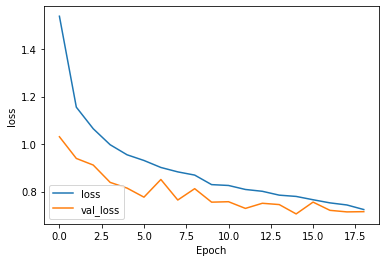

In [17]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower left')


In [18]:
#Evaluating the test data.

scores = model.evaluate(x_test, y_test,verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 6s 19ms/step - loss: 0.7672 - accuracy: 0.7435
Test loss: 0.7672441601753235
Test accuracy: 0.7434999942779541


In [19]:
model.save("Customized_VGG16_CIFAR10.model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Customized_VGG16_CIFAR10.model/assets
